In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from  mpl_toolkits.basemap import Basemap

from matplotlib import font_manager as fm
from matplotlib import rc
fm.get_fontconfig_fonts()
font_path='C:/Windows/Fonts/a아시아헤드2.ttf'
font = fm.FontProperties(fname=font_path).get_name()
rc('font',family=font)

# Data Load

In [2]:
path_precip = './precip.mon.ltm.nc'
path_uwnd = './uwnd.mon.ltm.nc'
path_vwnd = './vwnd.mon.ltm.nc'

precip_nc = xr.open_dataset(path_precip)
uwnd_nc = xr.open_dataset(path_uwnd)
vwnd_nc = xr.open_dataset(path_vwnd)

print(precip_nc)
#print(uwnd_nc)
#print(vwnd_nc)
#print(omega_nc)

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon                 (lon) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    curator:                        Dr. Jian-Jian Wang\nESSIC, University of ...
    description:                    http://eagle1.umd.edu/GPCP_ICDR/GPCPmonth...
    citation:                       Adler, R.F., G.J. Huffman, A. Chang, R. F...
    title:                          GPCP Version 2.3 Combined Precipitation D...
    platform:                       NOAA POES (Polar Orbiting Environm

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable

# Data Processing

In [3]:
precip = precip_nc.data_vars['precip']
uwnd = uwnd_nc.data_vars['uwnd']
vwnd = vwnd_nc.data_vars['vwnd']

#(time, lat, lon)
print(precip.shape)

#(time, level, lat, lon)
print(uwnd.shape)
print(vwnd.shape)

(12, 72, 144)
(12, 17, 73, 144)
(12, 17, 73, 144)


In [4]:
#select level (850)
uwnd = uwnd.sel(level=850)
vwnd = vwnd.sel(level=850)
,
print(uwnd.shape)
print(vwnd.shape)

(12, 73, 144)
(12, 73, 144)


In [5]:
#select domain
precip = precip.sel(lon=slice(225, 295),lat=slice(20,60))
uwnd = uwnd.sel(lon=slice(225, 295),lat=slice(60,20))
vwnd = vwnd.sel(lon=slice(225, 295),lat=slice(60,20))

print(precip.shape)
print(uwnd.shap
print(vwnd.shape)

(12, 16, 28)
(12, 17, 29)
(12, 17, 29)


# Visualization using a function 

In [6]:
#function which plot North American Monsoon
def plot_NAM(ax, month=int):
    
    select_time = '0001-0'+str(month)
    month_title = str(month) + '월'
    
    #Basemap 인스턴스 생성
    m = Basemap(
    lon_0=0, lat_0=0,
    llcrnrlon=225, llcrnrlat=20, urcrnrlon=295, urcrnrlat=60,
    resolution = 'i', ax=ax)
    
    coord=np.meshgrid(precip.lon, precip.lat)
    
    m.drawcoastlines(linewidth=1, color='gray') #draw coastlines
    m.drawcounties(linewidth=1, color='gray') #Draw county boundaries in US
    m.drawstates(linewidth=1, color='gray') #Draw state boundaries in Americas.
    m.drawparallels(np.linspace(20,60,5), labels=[1,0,0,0], linewidth=0)
    m.drawmeridians(np.linspace(225,295,6), labels=[0,0,0,1], linewidth=0)
    
    #나만의 cmap list 인스턴스 생성. 
    #Make a linear segmented colormap with name from a sequence of colors 
    #which evenly transitions from colors[0] at val=0 to colors[-1] at val=1. 
    #N is the number of rgb quantization levels. 
    #Alternatively, a list of (value, color) tuples can be given to divide the range unevenly.
    #more info. http://asq.kr/yi8dvYbSO
    #http://asq.kr/ZO3KKDF1
    mycmap = LinearSegmentedColormap.from_list('mycmap',['white', 'orange','red','darkred'])
    precip_contour = m.contourf(coord[0],coord[1],precip.sel(time=select_time)[0],cmap=mycmap,
                    levels=[0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5])
    
    cbar = m.colorbar(precip_contour, ax=ax, location = 'right')
    cbar.ax.tick_params(labelsize=10)
    
    coord = np.meshgrid(uwnd.lon, uwnd.lat)
    m.quiver(coord[0], coord[1], uwnd.sel(time=select_time)[0],vwnd.sel(time=select_time)[0],
            width=0.003, scale=200)
    
    ax.set_title('NAM '+ month_title)

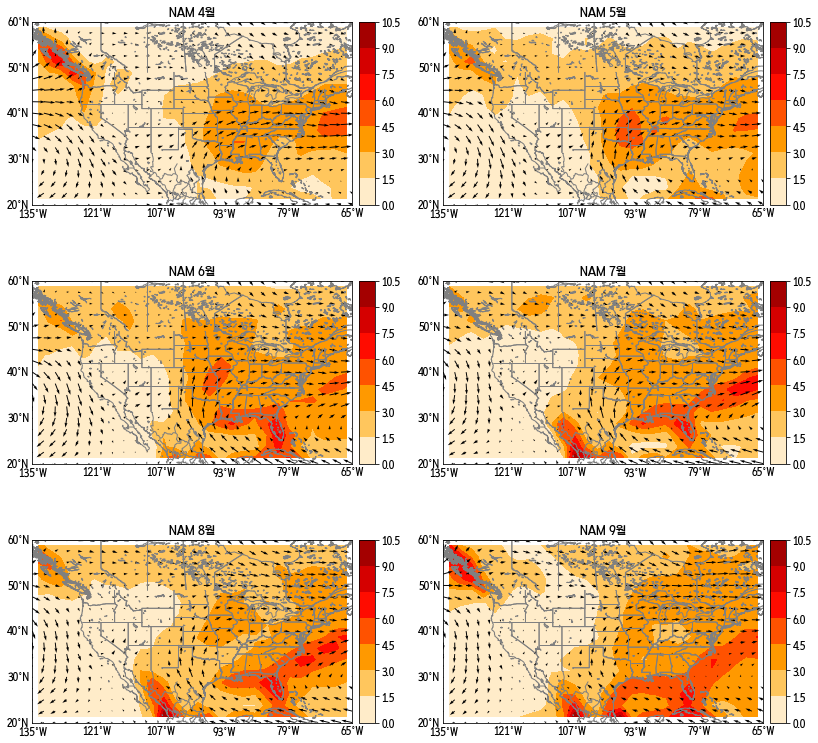

In [7]:
nrow = 3
ncol = 2
fig, ax = plt.subplots(nrows = nrow, ncols = ncol,figsize=(13.5,13.5))

# 4.5/6.7/8,9 배열

for row in range(0,3):
    for col in range(0,2):
            plot_NAM(ax[row][col],row*2+col+4)
            
            
#4.7/5,8/6.9 배열
            
#for col in range(0,2):
#    for row in range(0,3):
#        plot_NAM(ax[row][col],row+col*3+4)